In [127]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [35]:
housing=pd.read_csv('train.csv')

In [36]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [37]:
housing.shape # This dataframe has 81 columns and 1460 rows

(1460, 81)

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Now let's check few statistic values for integer type columns  using describe method
housing.describe()
# It shows 38 integer columns with all their values. This also shows few null values as per the count. So let's evaluate it

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
# let's check the null value percentage
df=100*(housing.isnull().sum()/1460)
df=df[df>0]
df.sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [20]:
# Checking the values we will be dropping PoolQC, MiscFeature,Alley,Fence
# FireplaceQu is less than 50% so let's analyze its values

In [8]:
housing['FireplaceQu'].info()
housing['FireplaceQu'].value_counts() # This shows that data is somewhat distributed

<class 'pandas.core.series.Series'>
RangeIndex: 1460 entries, 0 to 1459
Series name: FireplaceQu
Non-Null Count  Dtype 
--------------  ----- 
770 non-null    object
dtypes: object(1)
memory usage: 11.5+ KB


Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

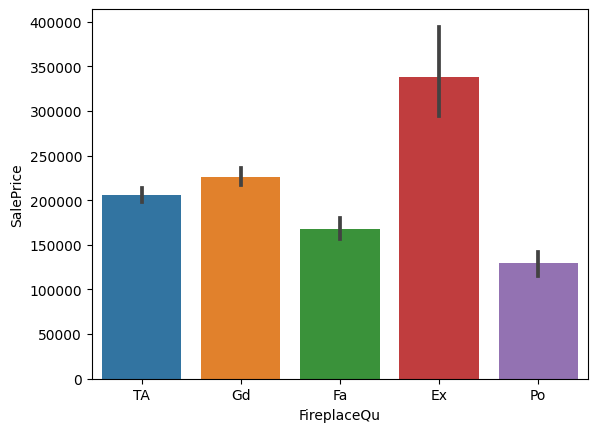

In [9]:
# Let's check it's behaviour with Sale price.
sns.barplot(data=housing,y='SalePrice', x='FireplaceQu')
plt.show() 
# This shows that FireplaceQu has an impact . If the quality is Excellent then the saleprice is high and it decreases with the quality.
#So there is direct relation . As quality increases , Sale price increases.


In [38]:
# Also if we see Id  (Id is not required to be a part and others have 50% or more than 50% null values)
housing=housing.drop(columns=['Id','Alley','PoolQC','Fence','MiscFeature'])
# Rest few of them we need to impute the values for them. That we will do later.

In [39]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [12]:
housing.corr()
# The correlation matrix between the different integer variables helps to eliminate the variable having very less correlation
# with the Sale price. But before this convert the values into proper types.

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.088011,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [34]:
# Checking this matrix we can delete few of the integer values with very less correlation.
#['BsmtFinSF2','3SsnPorch','MiscVal']
# But before this just looking at their relation visually.

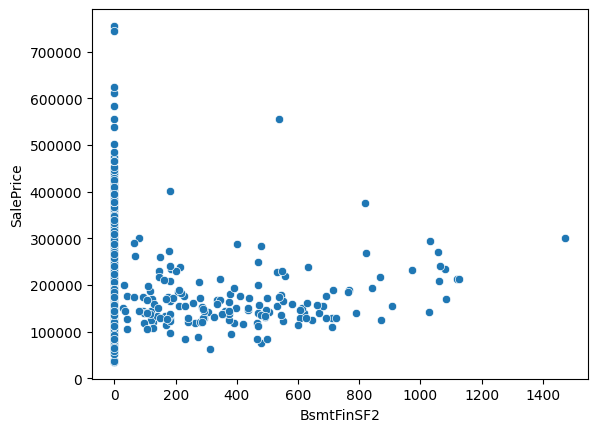

0       1293
180        5
374        3
551        2
147        2
        ... 
532        1
165        1
1120       1
311        1
1029       1
Name: BsmtFinSF2, Length: 144, dtype: int64

In [38]:
sns.scatterplot(housing,x='BsmtFinSF2',y='SalePrice')
plt.show()
# Looking at this we can't deduce anything as it is concentrated at one place
housing['BsmtFinSF2'].value_counts() # most of the valuues are 0 so data is too redundant so better to drop 

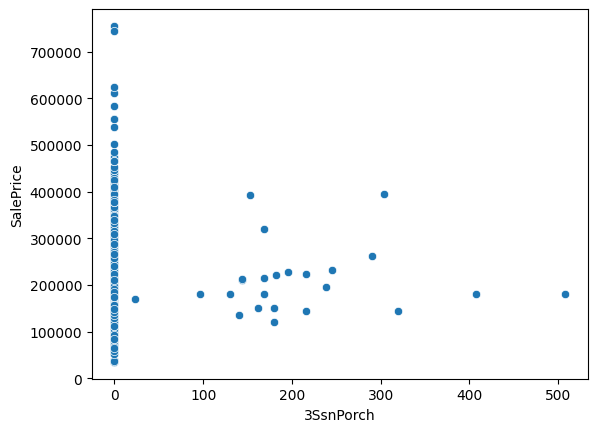

In [39]:
sns.scatterplot(housing,x='3SsnPorch',y='SalePrice')
plt.show() # similar is the case with this as well

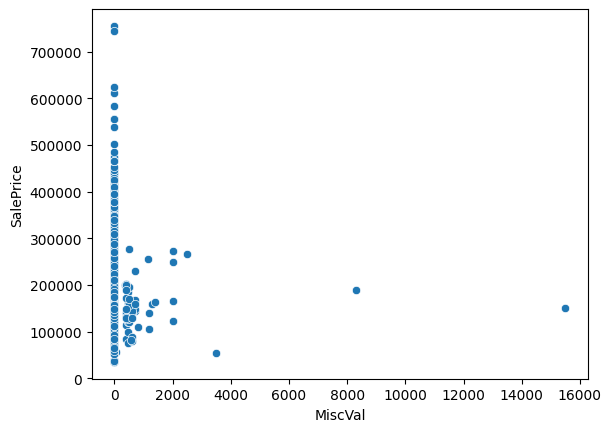

In [40]:
sns.scatterplot(housing,x='MiscVal',y='SalePrice')
plt.show() # So this proves correlation matrix was correct in detecting there minimal relationship

In [40]:
# Finally  we can delete few of the integer values with very less correlation.
#['BsmtFinSF2','3SsnPorch','MiscVal']
housing= housing.drop(columns=['BsmtFinSF2','3SsnPorch','MiscVal'])

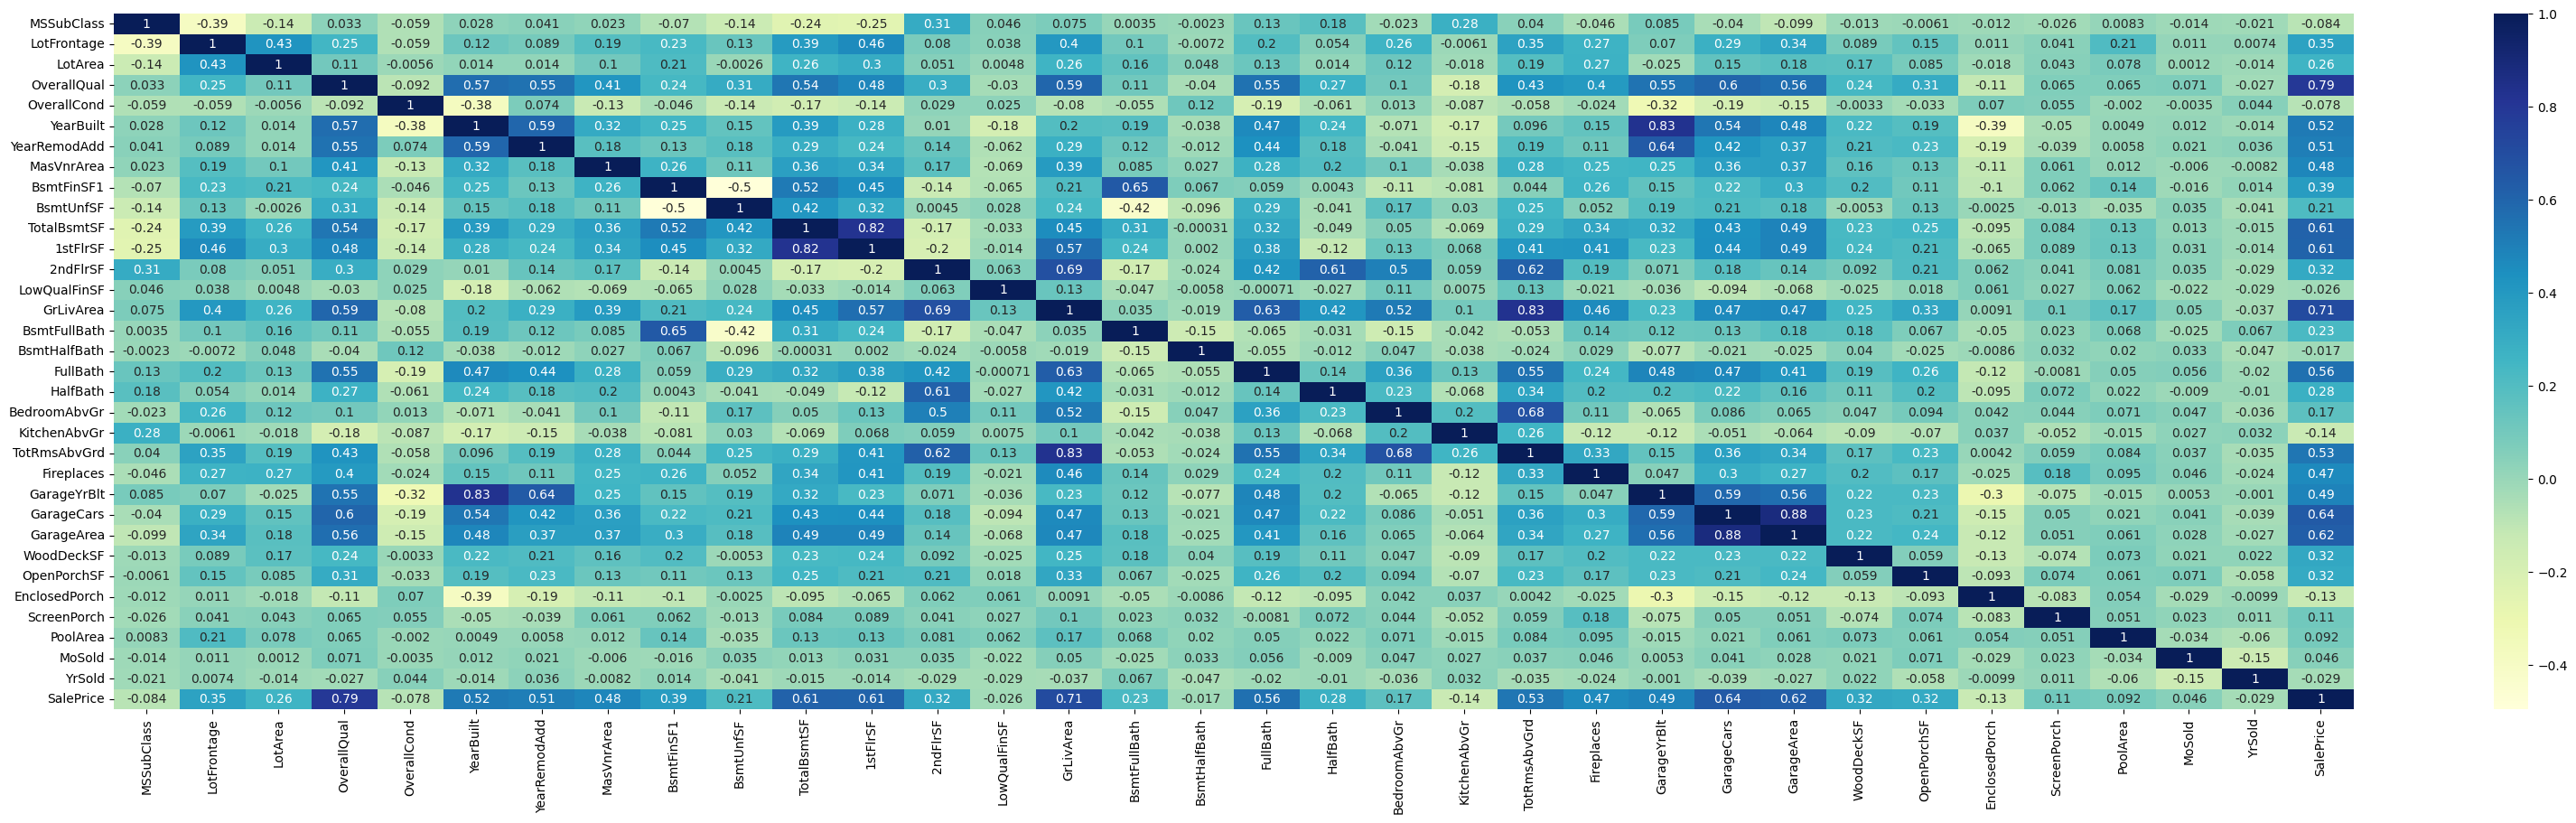

In [41]:
plt.figure(figsize = (40,10))
sns.heatmap(housing.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [42]:
# Looking at the matrix there are 3 variables related to build of houses
# MoSold, YearBuilt, YearRemodAdd, YrSold
# YearSold and MoSold has very low relation with the SalePrice. So let's drop these.
# We can create a derived attribute from YearBuilt and YearRemodAdd as both these have good correlation with SalePrice
# and their correlation is also good.
housing['RemodelTimeFromBuilt']=housing['YearRemodAdd']-housing['YearBuilt']

In [43]:
housing.head() # Thus we can remove these YearRemodAdd and YearBuilt as well

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MoSold,YrSold,SaleType,SaleCondition,SalePrice,RemodelTimeFromBuilt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,2,2008,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,5,2007,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,9,2008,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,2,2006,WD,Abnorml,140000,55
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,12,2008,WD,Normal,250000,0


In [376]:
#Now checking more of the entire values we can remove some more to make the data more clear and concise
# We can also delete the variables having correlation less than 0.2 and also greater than -0.2
# ['LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','ScreenPorch','PoolArea']
# + the year variables
#Analyzing 1 or 2 variables graphically

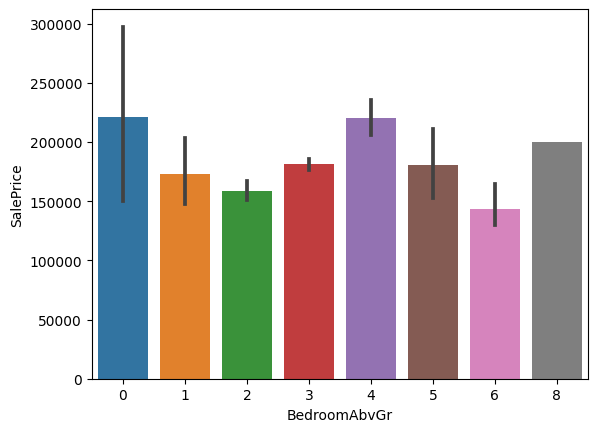

In [45]:
sns.barplot(housing,x='BedroomAbvGr',y='SalePrice')
plt.show() # There is no clear relationship so we can drop this 

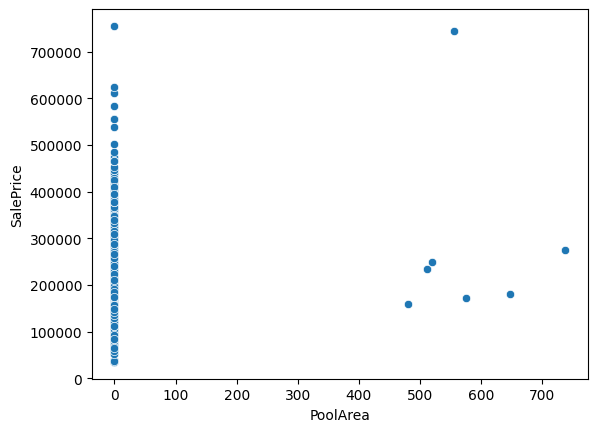

In [49]:
sns.scatterplot(housing,x='EnclosedPorch',y='SalePrice')
plt.show() # There is no clear relationship so we can drop this . concentration at one place is more.

In [44]:
# Therefore dropping these columns
housing= housing.drop(columns=['LowQualFinSF','BsmtHalfBath','BedroomAbvGr','KitchenAbvGr','EnclosedPorch','ScreenPorch','PoolArea','YearRemodAdd','YearBuilt','YrSold','MoSold'])

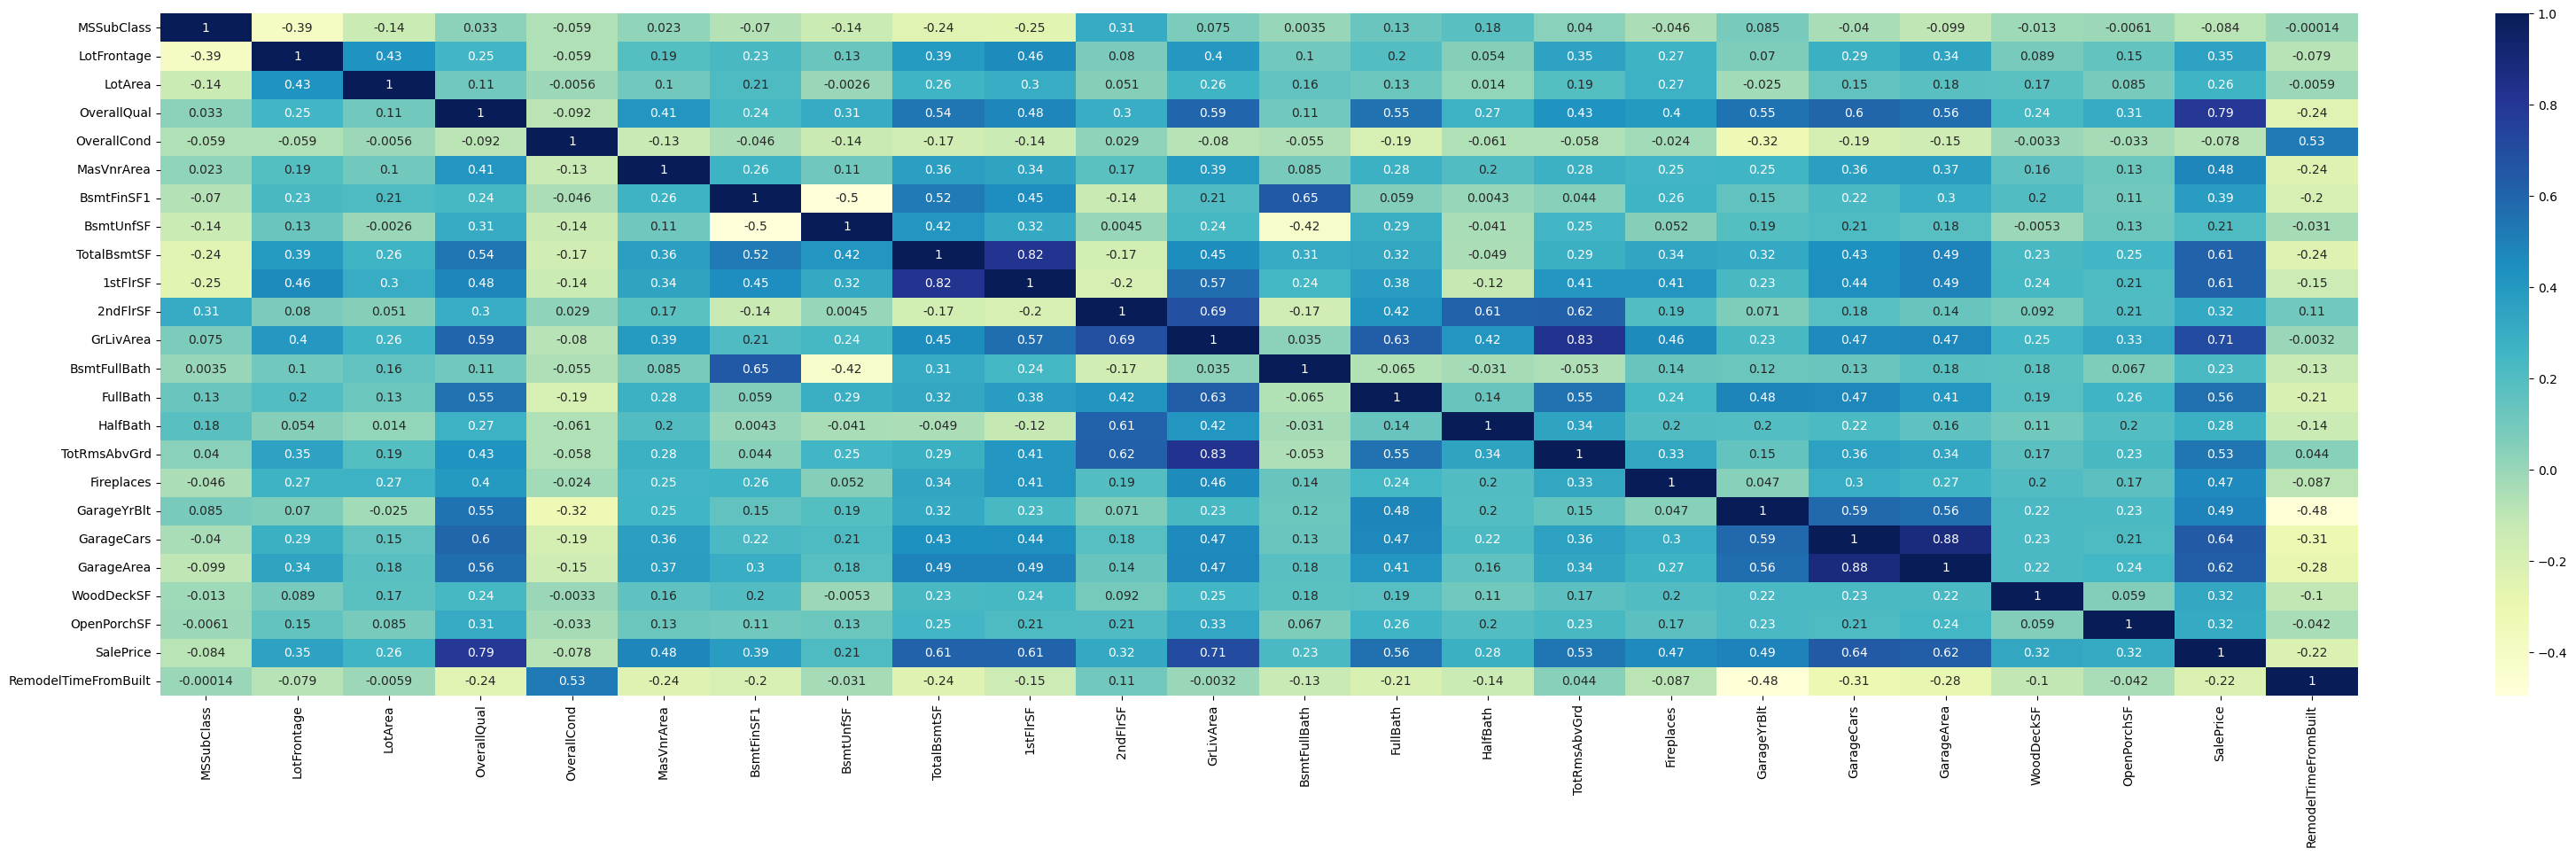

In [45]:
plt.figure(figsize = (40,10))
sns.heatmap(housing.corr(), cmap="YlGnBu",annot=True)
plt.show()

In [46]:
# Here few variables are correlated with other variables so we can drop those to avoid multicollinearity
# 1. Garage cars and Garage area seem to be related so we can drop GarageCars
# 2. YearBuilt is more important which we have already considered than GarageYrBlt and they have strong correlation so drop GarageYrBlt
# 3. TotRmsAbvGrd is positively correlated to GrLivArea so drop TotRmsAbvGrd
housing= housing.drop(columns=['GarageCars','GarageYrBlt','TotRmsAbvGrd'])

In [47]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1460 non-null   int64  
 1   MSZoning              1460 non-null   object 
 2   LotFrontage           1201 non-null   float64
 3   LotArea               1460 non-null   int64  
 4   Street                1460 non-null   object 
 5   LotShape              1460 non-null   object 
 6   LandContour           1460 non-null   object 
 7   Utilities             1460 non-null   object 
 8   LotConfig             1460 non-null   object 
 9   LandSlope             1460 non-null   object 
 10  Neighborhood          1460 non-null   object 
 11  Condition1            1460 non-null   object 
 12  Condition2            1460 non-null   object 
 13  BldgType              1460 non-null   object 
 14  HouseStyle            1460 non-null   object 
 15  OverallQual          

### Imputing the missing values

In [21]:
# Now checking the variance of certain numerical columns
housing.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,RemodelTimeFromBuilt
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,103.685262,443.639726,567.240411,1057.429452,1162.626712,346.992466,1515.463699,0.425342,1.565068,0.382877,0.613014,472.980137,94.244521,46.660274,180921.195890,13.597945
std,42.300571,24.284752,9981.264932,1.382997,1.112799,181.066207,456.098091,441.866955,438.705324,386.587738,436.528436,525.480383,0.518911,0.550916,0.502885,0.644666,213.804841,125.338794,66.256028,79442.502883,24.476465
min,20.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,1129.500000,0.000000,1.000000,0.000000,0.000000,334.500000,0.000000,0.000000,129975.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,477.500000,991.500000,1087.000000,0.000000,1464.000000,0.000000,2.000000,0.000000,1.000000,480.000000,0.000000,25.000000,163000.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,166.000000,712.250000,808.000000,1298.250000,1391.250000,728.000000,1776.750000,1.000000,2.000000,1.000000,1.000000,576.000000,168.000000,68.000000,214000.000000,20.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,2336.000000,6110.000000,4692.000000,2065.000000,5642.000000,3.000000,3.000000,2.000000,3.000000,1418.000000,857.000000,547.000000,755000.000000,123.000000


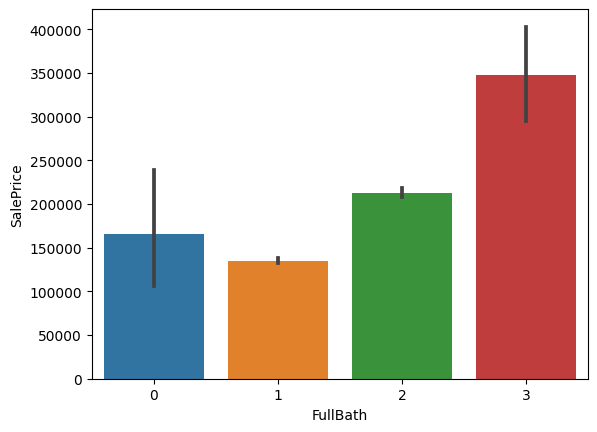

In [22]:
# Let's check for basement variables to analyze a little further.
housing['FullBath'].value_counts()

sns.barplot(housing,x='FullBath',y='SalePrice')
plt.show() # Almost with increase in Full bath , saleprice increases.



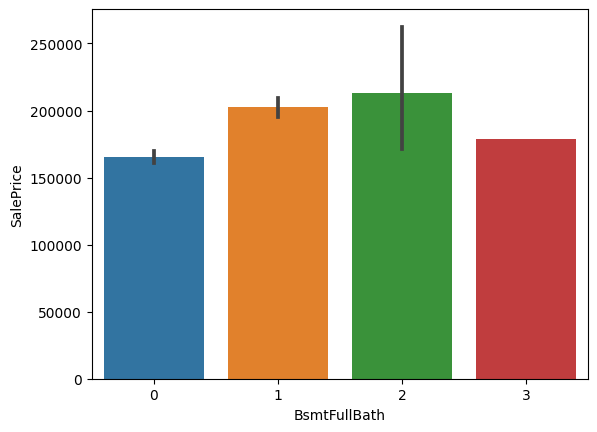

In [61]:
housing['BsmtFullBath'].value_counts()
sns.barplot(housing,x='BsmtFullBath',y='SalePrice')
plt.show() # Not able to underatand the linkage clearly. Let us keep them and check the model.

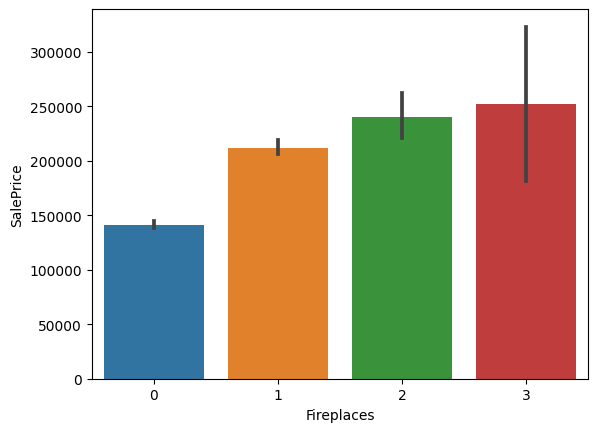

In [62]:
housing['Fireplaces'].value_counts()
sns.barplot(housing,x='Fireplaces',y='SalePrice')
plt.show() # this is directly related. This shouldn't be dropped.


In [63]:
# Before missing value imputation let's check few categorical variables as well.
housing.head(100)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice,RemodelTimeFromBuilt
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,Gd,Typ,0,NaN,Attchd,RFn,548,TA,TA,Y,0,61,WD,Normal,208500,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,TA,Typ,1,TA,Attchd,RFn,460,TA,TA,Y,298,0,WD,Normal,181500,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,Gd,Typ,1,TA,Attchd,RFn,608,TA,TA,Y,0,42,WD,Normal,223500,1
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,Gd,Typ,1,Gd,Detchd,Unf,642,TA,TA,Y,0,35,WD,Abnorml,140000,55
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,Gd,Typ,1,TA,Attchd,RFn,836,TA,TA,Y,192,84,WD,Normal,250000,0
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,64,796,GasA,Ex,Y,SBrkr,796,566,1362,1,1,1,TA,Typ,0,NaN,Attchd,Unf,480,TA,TA,Y,40,30,WD,Normal,143000,2
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,317,1686,GasA,Ex,Y,SBrkr,1694,0,1694,1,2,0,Gd,Typ,1,Gd,Attchd,RFn,636,TA,TA,Y,255,57,WD,Normal,307000,1
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,216,1107,GasA,Ex,Y,SBrkr,1107,983,2090,1,2,1,TA,Typ,2,TA,Attchd,RFn,484,TA,TA,Y,235,204,WD,Normal,200000,0
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,952,952,GasA,Gd,Y,FuseF,1022,752,1774,0,2,0,TA,Min1,2,TA,Detchd,Unf,468,Fa,TA,Y,90,0,WD,Abnorml,129900,19
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,140,991,GasA,Ex,Y,SBrkr,1077,0,1077,1,1,0,TA,Typ,2,TA,Attchd,RFn,205,Gd,TA,Y,0,4,WD,Normal,118000,11


In [66]:
# Seeing these values let's check few variables as 100 values do not show much difference in them.
housing.Street.value_counts() # Data has mostly one value. This will affect our processing. 


Pave    1454
Grvl       6
Name: Street, dtype: int64

In [48]:
housing.Utilities.value_counts() # This also one single data except 1 record
#dropping Street and Utilities
housing=housing.drop(columns=['Street','Utilities'],axis=1)

In [24]:
housing.LandContour.value_counts() # This we can keep

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [72]:
housing.Heating.value_counts() # Though most of them have the same value but sill keeping it.

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

#### Missing value imputation

In [49]:
# let's check the null value percentage
df=100*(housing.isnull().sum()/1460)
df=df[df>0]
df.sort_values(ascending=False)

FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrType       0.547945
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [ ]:
#List of columns containing null values
#nullValueList=['FireplaceQu','LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical'
# 'GarageType','GarageFinish','GaraeQual','GarageCond']

#List for which null means that facility doesn't exist-['FireplaceQu','GarageType','GarageFinish','GaraeQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
#so handling these first

In [50]:
NullList=['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
housing[NullList].info() # All of them are objects.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FireplaceQu   770 non-null    object
 1   GarageType    1379 non-null   object
 2   GarageFinish  1379 non-null   object
 3   GarageQual    1379 non-null   object
 4   GarageCond    1379 non-null   object
 5   BsmtQual      1423 non-null   object
 6   BsmtCond      1423 non-null   object
 7   BsmtExposure  1422 non-null   object
 8   BsmtFinType1  1423 non-null   object
 9   BsmtFinType2  1422 non-null   object
dtypes: object(10)
memory usage: 114.2+ KB


In [51]:
for i in NullList:
    housing[i].fillna('NA',inplace=True)

In [53]:
# let's check the null value percentage
df=(housing.isnull().sum())
df=df[df>0]
df.sort_values(ascending=False)
# So I am left with

LotFrontage    259
MasVnrType       8
MasVnrArea       8
Electrical       1
dtype: int64

In [57]:
# We can drop the row for Electrical as there is only one row
housing=housing [(housing['Electrical'].isna()==False)]

In [58]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1459 non-null   int64  
 1   MSZoning              1459 non-null   object 
 2   LotFrontage           1200 non-null   float64
 3   LotArea               1459 non-null   int64  
 4   LotShape              1459 non-null   object 
 5   LandContour           1459 non-null   object 
 6   LotConfig             1459 non-null   object 
 7   LandSlope             1459 non-null   object 
 8   Neighborhood          1459 non-null   object 
 9   Condition1            1459 non-null   object 
 10  Condition2            1459 non-null   object 
 11  BldgType              1459 non-null   object 
 12  HouseStyle            1459 non-null   object 
 13  OverallQual           1459 non-null   int64  
 14  OverallCond           1459 non-null   int64  
 15  RoofStyle            

In [59]:
housing['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [60]:
housing['LotFrontage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1459 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1200 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [67]:
housing["LotFrontage"].fillna(housing["LotFrontage"].median(),inplace=True)


In [68]:
housing['LotFrontage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1459 entries, 0 to 1459
Series name: LotFrontage
Non-Null Count  Dtype  
--------------  -----  
1459 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


In [69]:
housing['MasVnrArea'].info()
housing['MasVnrArea'].value_counts()

<class 'pandas.core.series.Series'>
Int64Index: 1459 entries, 0 to 1459
Series name: MasVnrArea
Non-Null Count  Dtype  
--------------  -----  
1451 non-null   float64
dtypes: float64(1)
memory usage: 22.8 KB


0.0      860
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

In [71]:
# replacing the null values with mode i.e. 0
housing['MasVnrArea'].fillna(0,inplace=True)


In [72]:
df=100*(housing.isnull().sum()/1460)
df=df[df>0]
df.sort_values(ascending=False)

MasVnrType    0.547945
dtype: float64

In [76]:
housing[(housing['MasVnrType'].isnull()==True)]
housing['MasVnrType'].value_counts() # So we can assign it with None value since it is the highest one

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [77]:
housing['MasVnrType'].fillna('None',inplace=True)

In [78]:
df=100*(housing.isnull().sum()/1460)
df=df[df>0]
df.sort_values(ascending=False)
# So now we have imputed all the missing values 

Series([], dtype: float64)

In [79]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MSSubClass            1459 non-null   int64  
 1   MSZoning              1459 non-null   object 
 2   LotFrontage           1459 non-null   float64
 3   LotArea               1459 non-null   int64  
 4   LotShape              1459 non-null   object 
 5   LandContour           1459 non-null   object 
 6   LotConfig             1459 non-null   object 
 7   LandSlope             1459 non-null   object 
 8   Neighborhood          1459 non-null   object 
 9   Condition1            1459 non-null   object 
 10  Condition2            1459 non-null   object 
 11  BldgType              1459 non-null   object 
 12  HouseStyle            1459 non-null   object 
 13  OverallQual           1459 non-null   int64  
 14  OverallCond           1459 non-null   int64  
 15  RoofStyle            

### Now dummy creation for categorical variables

In [83]:
numeric_list=['int','float']
numeric_variables=housing.select_dtypes(include=numeric_list) # list of numeric columns (Total=21)
numeric_variables

categrical_variables=housing.select_dtypes(include='object') # list of categorical ones (Total=37)
categrical_variables

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,NA,Attchd,Unf,TA,TA,Y,WD,Normal


In [85]:
numeric_variables.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice',
       'RemodelTimeFromBuilt'],
      dtype='object')

In [88]:
categrical_variables.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [91]:
#Below are the categorical variables for creating dummies

#['MSSubClass',MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
#       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
#      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
#      , 'Foundation', 'Heating', 
#      'CentralAir', 'Electrical',  'Functional', 'FireplaceQu',
#      'GarageType', 'GarageFinish', 'PavedDrive',
#      'SaleType', 'SaleCondition']

categorical_onehot=['MSSubClass','MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
     'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
      'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'Heating', 
      'CentralAir', 'Electrical',  'Functional', 'FireplaceQu',
      'GarageType', 'GarageFinish', 'PavedDrive',
      'SaleType', 'SaleCondition']


# check for ordinal variables  so we will do label encoding for this.
# ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond']
ordinal_labelencoding=['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond']

In [95]:
housing=pd.get_dummies(housing, columns = categorical_onehot,drop_first=True)

In [96]:
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SalePrice,RemodelTimeFromBuilt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,Gd,TA,Gd,TA,No,GLQ,706,Unf,150,856,Ex,856,854,1710,1,2,1,Gd,0,548,TA,TA,0,61,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,TA,TA,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,1262,0,1262,0,2,0,TA,1,460,TA,TA,298,0,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,Gd,TA,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,920,866,1786,1,2,1,Gd,1,608,TA,TA,0,42,223500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,TA,TA,TA,Gd,No,ALQ,216,Unf,540,756,Gd,961,756,1717,1,1,0,Gd,1,642,TA,TA,0,35,140000,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,Gd,TA,Gd,TA,Av,GLQ,655,Unf,490,1145,Ex,1145,1053,2198,1,2,1,Gd,1,836,TA,TA,192,84,250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


#### Dropping the corresponding variables for which dummies have been added


In [104]:
housing.shape

(1459, 205)

In [105]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Columns: 205 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(2), int64(18), object(11), uint8(174)
memory usage: 612.7+ KB


In [172]:
### Convert ordinal variables into encoding
# check for ordinal variables  i.e. ordinal_labelencoding
# ['ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','KitchenQual','GarageQual','GarageCond']

In [106]:
# List of ExterQual to map

varlist =  ['ExterQual','ExterCond']

# Defining the map function
def binary_map(x):
    return x.map({'Ex': 5, 'Gd': 4,'TA':3,'Fa':2,'Po':1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [107]:
housing['ExterQual']

0       4
1       3
2       4
3       3
4       4
       ..
1455    3
1456    3
1457    5
1458    3
1459    4
Name: ExterQual, Length: 1459, dtype: int64

In [108]:
# List of BsmtQual,BsmtCond to map

varlist =  ['BsmtQual','BsmtCond']

# Defining the map function
def binary_map(x):
    return x.map({'Ex': 5, 'Gd': 4,'TA':3,'Fa':2,'Po':1,'NA':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [109]:
# List of BsmtExposure to map

varlist =  ['BsmtExposure']

# Defining the map function
def binary_map(x):
    return x.map({'Gd': 4, 'Av': 3,'Mn':2,'No':1,'NA':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)


In [110]:
# List of BsmtFinType1,BsmtFinType2 to map

varlist =  ['BsmtFinType1','BsmtFinType2']

# Defining the map function
def binary_map(x):
    return x.map({'GLQ': 6, 'ALQ': 5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [111]:

# List of HeatingQC,KitchenQual to map

varlist =  ['HeatingQC','KitchenQual']

# Defining the map function
def binary_map(x):
    return x.map({'Ex': 5, 'Gd': 4,'TA':3,'Fa':2,'Po':1})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [112]:
housing_new=housing

In [113]:
# List of GarageQual,GarageCond to map

varlist =  ['GarageQual','GarageCond']

# Defining the map function
def binary_map(x):
    return x.map({'Ex': 5, 'Gd': 4,'TA':3,'Fa':2,'Po':1,'NA':0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [114]:
housing.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SalePrice,RemodelTimeFromBuilt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,196.0,4,3,4,3,1,6,706,1,150,856,5,856,854,1710,1,2,1,4,0,548,3,3,0,61,208500,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,0.0,3,3,4,3,4,5,978,1,284,1262,5,1262,0,1262,0,2,0,3,1,460,3,3,298,0,181500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,162.0,4,3,4,3,2,6,486,1,434,920,5,920,866,1786,1,2,1,4,1,608,3,3,0,42,223500,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,0.0,3,3,3,4,1,5,216,1,540,756,4,961,756,1717,1,1,0,4,1,642,3,3,0,35,140000,55,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,350.0,4,3,4,3,3,6,655,1,490,1145,5,1145,1053,2198,1,2,1,4,1,836,3,3,192,84,250000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [115]:
housing.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SalePrice,RemodelTimeFromBuilt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,...,1459.000000,1459.000000,1459.00000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,69.861549,10517.363948,6.100069,5.575737,103.187800,3.396162,3.083619,3.488691,2.934887,1.630569,3.547635,443.943797,1.247430,567.366004,1057.891021,4.145305,1162.906785,346.791638,1515.546950,0.425634,1.564770,0.382454,3.511309,0.613434,473.030158,2.810144,2.808773,94.240576,46.692255,180930.394791,13.606580,0.047293,0.002742,0.008225,0.098698,0.204935,0.041124,0.010966,0.039068,0.013708,0.035641,0.059630,0.043180,0.006854,0.020562,0.044551,0.010966,0.788211,0.149417,0.028101,...,0.434544,0.442769,0.01645,0.004112,0.002056,0.978067,0.012337,0.004798,0.001371,0.002742,0.934887,0.018506,0.002056,0.000685,0.914325,0.003427,0.021247,0.023304,0.010281,0.000685,0.931460,0.022618,0.260452,0.472241,0.013708,0.214531,0.596299,0.013023,0.059630,0.006169,0.265250,0.055517,0.055517,0.289239,0.414668,0.020562,0.917752,0.002742,0.001371,0.006169,0.003427,0.003427,0.083619,0.002056,0.867718,0.002742,0.008225,0.013708,0.820425,0.085675
std,22.035077,9984.666267,1.383171,1.113079,180.773158,0.574384,0.351167,0.876677,0.552345,1.067630,2.107443,456.106417,0.892615,441.992392,438.500975,0.959822,386.572089,436.610637,525.650927,0.518969,0.550987,0.502798,0.663864,0.644687,213.869604,0.723129,0.719915,125.381679,66.267472,79468.964025,24.482633,0.212337,0.052306,0.090348,0.298358,0.403792,0.198645,0.104181,0.193823,0.116316,0.185457,0.236881,0.203332,0.082533,0.141961,0.206387,

In [117]:
housingFinal=housing # Just creating a variable just in case we need it

In [120]:
y=housing['SalePrice']    # Target Variable
X=housing.drop('SalePrice',axis=1) # Other features

In [163]:
# split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=42)

In [164]:
X_train.shape

(1021, 204)

In [165]:
y_train.shape

(1021,)

In [169]:
col=X_train.columns

In [170]:
X_train.columns = X_train.columns.astype(str)

##### Apply scaling to X

In [171]:
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [172]:
# Instantiate
lm_original = LinearRegression()

# Fit a line
lm_original.fit(X_train, y_train)      # We have used all the columns currently and check its values.

LinearRegression()

In [131]:
# Print the coefficients and intercept
print(lm_original.intercept_)
print(lm_original.coef_)

82796647258789.42
[ 1.35786192e+04  1.32533879e+05  7.33717513e+04  4.47381198e+04
  6.26250208e+04  1.85307072e+04 -1.71285673e+04  3.45659692e+04
 -3.87121378e+04  2.42059720e+04  5.36651171e+02  8.02206830e+04
  3.61267984e+03 -1.07463185e+04  1.37038183e+05  4.83851465e+03
 -5.88076894e+04 -7.39745071e+03  3.08952482e+05  8.94123761e+03
  1.82545129e+04  1.02056068e+04  2.05120990e+04  2.63999231e+04
  5.73435862e+04  2.66977092e+04 -8.75557679e+03  1.15296457e+04
  2.75924605e+03 -6.81036851e+03 -2.20132129e+03 -3.53168327e+03
  1.47829191e+04  1.40525611e+04  2.47849733e+04  2.24944163e+04
 -2.70889316e+03 -2.06022773e+04 -1.14704834e+04 -6.20160210e+17
 -1.83652856e+04 -1.28608456e+02 -1.21127255e+04 -3.39783081e+04
  4.37625899e+04  4.21991097e+04  4.01117186e+04  3.86452123e+04
  1.19061864e+04  8.56321648e+02  6.42390916e+02  1.27656608e+04
 -2.75476035e+03  7.00594275e+03  8.54219290e+03 -6.52447732e+03
 -2.61659755e+04  1.34168171e+03 -1.10804472e+02 -3.93887293e+04
 -4.970

In [133]:
y_pred_train = lm_original.predict(X_train)
y_pred_test = lm_original.predict(X_test)


r2_train_original = r2_score(y_train, y_pred_train)
print("Train score",r2_train_original)
r2_test_original = r2_score(y_test, y_pred_test)
print("Test score",r2_test_original)
# We can see that train score is quite good but test score is too poor thus leading to overfitting.

Train score 0.9153910593399768
Test score -3.3641351423919404e+20


In [ ]:
# We can now use RFE to eliinate few columns and take only few of them almost half.

###### This is overfitting the data

Text(0.5, 0, ' Training Errors')

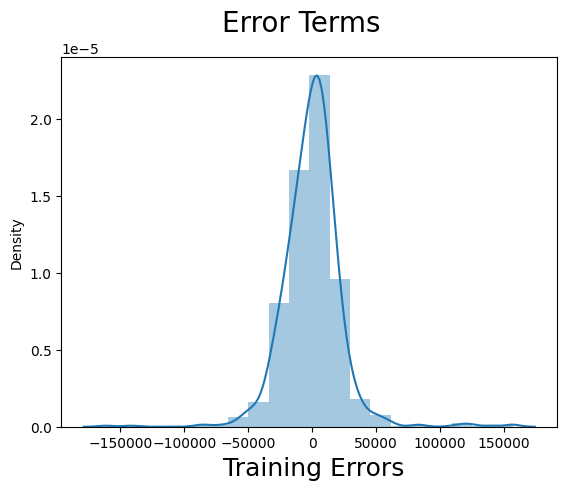

In [136]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel(' Training Errors', fontsize = 18) 

Text(0.5, 0, ' Testing Errors')

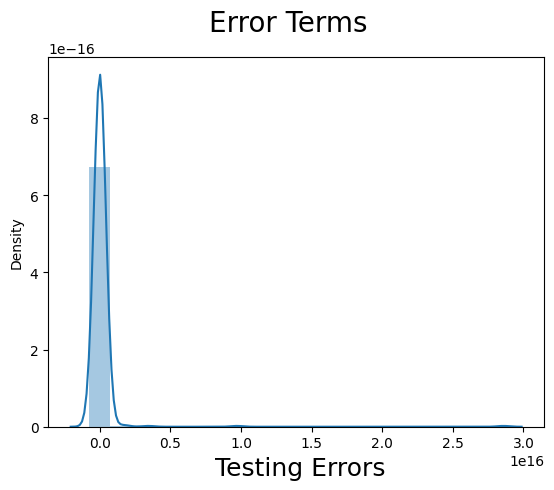

In [137]:
# Plot the histogram of the error terms  of testing
fig = plt.figure()
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel(' Testing Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred_test')

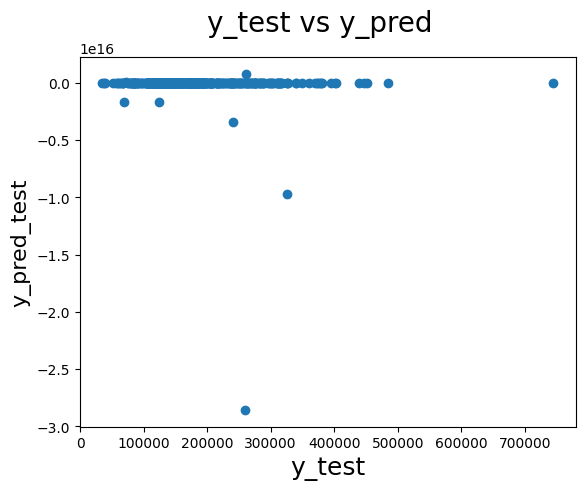

In [138]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred_test', fontsize = 16) 

### Implement RFE

In [174]:
# Choose features 
rfe = RFE(lm_original, n_features_to_select=100)            
rfe = rfe.fit(X_train, y_train)

In [175]:
list(zip(col,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 20),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('ExterQual', True, 1),
 ('ExterCond', False, 24),
 ('BsmtQual', True, 1),
 ('BsmtCond', True, 1),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 89),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 57),
 ('BsmtUnfSF', False, 75),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 68),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', False, 55),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 18),
 ('FullBath', False, 22),
 ('HalfBath', False, 29),
 ('KitchenQual', True, 1),
 ('Fireplaces', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', False, 3),
 ('GarageCond', False, 99),
 ('WoodDeckSF', False, 39),
 ('OpenPorchSF', False, 69),
 ('RemodelTimeFromBuilt', True, 1),
 ('MSSubClass_30', False, 64),
 ('MSSubClass_40', False, 8),
 ('MSSubClass_45', False, 7),
 ('MSSubClass_50', False, 12),
 ('MSSubClass_60', True, 1),
 ('MSSubClass_70', True, 1),
 ('MSSubC

In [180]:
col1 = col[rfe.support_]
col1

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
       '1stFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces', 'GarageArea',
       'RemodelTimeFromBuilt', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1

In [181]:
col1.shape

(100,)

In [187]:
# Creating X_test dataframe with RFE selected variables
#X_train_rfe = X_train[col1]
# Adding a constant variable 
X_train_rfe=X_train

#X_train_rfe = sm.add_constant(X_train_rfe_afterRFE)

In [194]:
X_train_rfe=pd.DataFrame(X_train,columns=col)
X_train_rfe.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,Fireplaces,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,RemodelTimeFromBuilt,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.202055,0.042534,0.666667,0.625,0.208999,0.333333,0.5,0.6,0.75,0.25,0.166667,0.000000,0.166667,0.558219,0.213421,0.75,0.309316,0.000000,0.253956,0.000000,0.666667,0.0,0.333333,0.333333,0.373766,0.6,0.6,0.114352,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.047945,0.011101,0.444444,0.500,0.058055,0.333333,0.5,0.8,0.75,1.00,1.000000,0.096917,0.166667,0.000000,0.089525,0.75,0.169344,0.000000,0.139035,0.333333,0.333333,0.0,0.333333,0.000000,0.370240,0.6,0.6,0.000000,0.051188,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.219178,0.068971,0.888889,0.500,0.150943,0.666667,0.5,1.0,0.75,0.75,1.000000,0.042523,0.166667,0.750000,0.326023,1.00,0.380450,0.467949,0.477393,0.000000,1.000000,0.5,1.000000,0.333333,0.504937,0.6,0.6,0.249708,0.197441,0.00813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.284247,0.094580,1.000000,0.625,0.849057,1.000000,0.5,1.0,0.75,1.00,1.000000,0.257796,0.166667,0.423373,0.400000,1.00,0.484167,1.000000,0.750188,0.000000,1.000000,0.5,1.000000,0.666667,0.586742,0.6,0.6,0.445741,0.091408,0.00813,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.075342,0.043782,0.666667,0.625,0.000000,0.666667,0.5,0.8,0.75,0.75,1.000000,0.068214,0.833333,0.029966,0.130769,1.00,0.113125,0.445513,0.250000,0.333333,0.666667,0.5,0.666667,0.333333,0.387870,0.6,0.6,0.184364,0.111517,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [195]:
X_train_rfe=X_train_rfe[col1]

In [210]:
X_train_rfe.head() # Thus it has now 100 best columns to consider

,const,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinSF1,TotalBsmtSF,1stFlrSF,GrLivArea,KitchenQual,Fireplaces,GarageArea,RemodelTimeFromBuilt,MSSubClass_60,MSSubClass_70,MSSubClass_90,MSSubClass_120,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_FR3,LandSlope_Sev,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Condition1_Norm,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,...,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_CBlock,Exterior1st_ImStucc,Exterior1st_Plywood,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stone,Exterior2nd_Wd Sdng,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Functional_Maj2,Functional_Sev,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,SaleType_CWD,SaleType_Con,SaleType_ConLI,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Partial
0,1.0,0.042534,0.666667,0.625,0.208999,0.333333,0.6,0.75,0.25,0.000000,0.213421,0.309316,0.253956,0.333333,0.333333,0.373766,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.011101,0.444444,0.500,0.058055,0.333333,0.8,0.75,1.00,0.096917,0.089525,0.169344,0.139035,0.333333,0.000000,0.370240,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.068971,0.888889,0.500,0.150943,0.666667,1.0,0.75,0.75,0.042523,0.326023,0.380450,0.477393,1.000000,0.333333,0.504937,0.00813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.094580,1.000000,0.625,0.849057,1.000000,1.0,0.75,1.00,0.257796,0.400000,0.484167,0.750188,1.000000,0.666667,0.586742,0.00813,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.043782,0.666667,0.625,0.000000,0.666667,0.8,0.75,0.75,0.068214,0.130769,0.113125,0.250000,0.666667,0.333333,0.387870,0.00000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [228]:
lm_RFE=sm.OLS(y_train,X_train_sqeeze).fit()

In [229]:
print(lm_RFE.summary()) # Rsquared has reduced

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     97.59
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        22:30:44   Log-Likelihood:                -11765.
No. Observations:                1021   AIC:                         2.371e+04
Df Residuals:                     929   BIC:                         2.417e+04
Df Model:                          91                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.096e+05   3.44e+04    -17.716      0.0

In [225]:
X_train_sqeeze=X_train_rfe.values

In [227]:
type(X_train_sqeeze)

numpy.ndarray

In [230]:
y_train_pred_RFE = lm_RFE.predict(X_train_sqeeze)
#r2_Score_RFE=r2_score(y_train, y_train_pred_RFE)
#print("Train score RFE::",r2_Score_RFE)

In [231]:
r2_Score_RFE=r2_score(y_train, y_train_pred_RFE)
print("Train score RFE::",r2_Score_RFE)

Train score RFE:: 0.905300864840629


Text(0.5, 0, 'Errors')

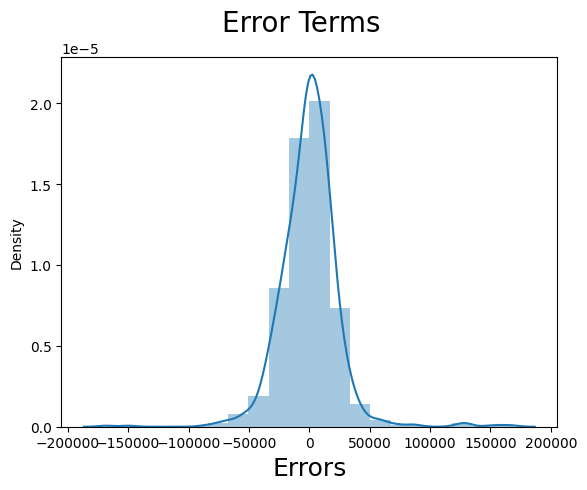

In [232]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred_RFE), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [234]:
X_test_rfe=pd.DataFrame(X_test,columns=col)
X_test_rfe=X_test_rfe[col1]



In [235]:

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)
# Making predictions

In [236]:
X_test_rfe=X_test_rfe.values
y_test_pred_RFE = lm_RFE.predict(X_test_rfe)



In [237]:
r2_ScoreTest_RFE=r2_score(y_test, y_test_pred_RFE)
r2_ScoreTest_RFE
print("Test score RFE",r2_ScoreTest_RFE) # Test score has improved than before

Test score RFE 0.6857100235304794


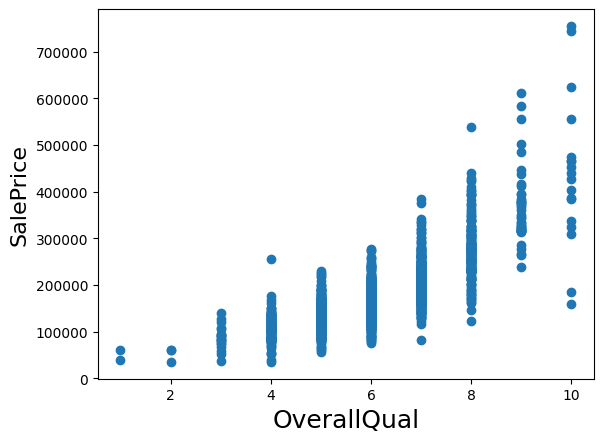

In [239]:
##### 0.7735787759400523  This r2 score is much better than the previous score.

##### 1.LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'ExterQual','BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'TotalBsmtSF',
### '1stFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces'
plt.scatter(housing['OverallQual'],y)  
plt.xlabel('OverallQual', fontsize=18)                          # X-label
plt.ylabel('SalePrice', fontsize=16) 
plt.show()
#These values are important as earlier also in the correlation matrix these had higher values. 
# As the OverallQuality increases the SalePrice increases(as for Excellent it has 10 value which is greater)

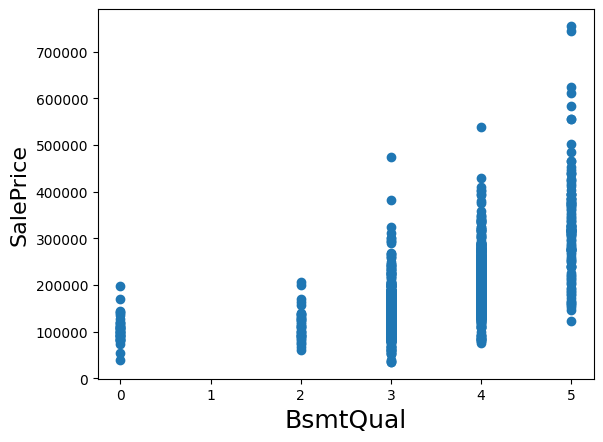

In [240]:
plt.scatter(housing['BsmtQual'],y)  
plt.xlabel('BsmtQual', fontsize=18)                          # X-label
plt.ylabel('SalePrice', fontsize=16) 
plt.show()
# With increase in basement quality the saleprice increases 

## Ridge Regression


In [242]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_rfe, y_train)   # Trying with original data with all the features

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### Ridge optimal value

In [243]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)  # This is the best fit for this model where we have taken all the features together no RFE included

{'alpha': 0.05}


In [244]:
#Fitting Ridge model for alpha = 0.05 and printing coefficients which have been penalised
alpha = 0.05
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_rfe, y_train)
print(ridge.coef_)

[      0.          120920.23355824   86520.74292014   40652.96373493
   46790.43677951   22163.29669095   50186.38741558  -38975.71668923
   22324.47270079  103674.60929413   38373.47212298  -34784.40708912
  315045.3829491    24992.725513     15447.30807616   57364.73589662
   -9693.10944444   28614.21881933   25208.60878516   -7910.8487172
  -25691.25445798  -26227.26679437   39682.79189496   33204.39676671
   31460.71529854   24556.4366611   -18980.76836721  -23567.2542552
  -14417.95941946  -16650.78233043  -24094.33458033  -29054.59830131
  -21262.31350091  -21774.96126277  -35393.07310239  -22833.25344187
  -26559.04226069  -32950.75332362   18680.18726449  -22469.66900512
  -33449.15927469  -19080.58804233  -21611.21968251  -17094.65710931
   29700.03736808  -25831.34558396   12216.37329573   18805.21648678
    6418.18633311   13937.71005376  -15344.83849695       0.
 -225963.12670615  -10842.31614371       0.           14650.65437024
   -7910.84871719   14187.33197764  -26853.9

In [245]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9004697713128806
0.7913883314425421
641633098558.6138
575973766561.0636
628435943.7400723
1315008599.454483


##### Here the optimal value of alpha is 0.05 as we have considered and the r2 value is also good  and the mse is having more differenc but we can lower it.

In [246]:
#Now doublig this alpha value to 0.1 let's see
#Fitting Ridge model for alpha = 40 and printing coefficients which have been penalised
alpha = 0.1
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train_rfe, y_train)
print(ridge2.coef_)

[      0.          107811.19516195   88946.64131571   38717.72132247
   48077.69158101   22333.89646789   53711.02837769  -34855.50484187
   23047.08551987   91868.75250629    4753.84989061  -23373.05664517
  305168.75338466   25928.5636252    16448.10786727   56423.35236193
   -8944.58654165   28931.47726698   25648.22387282   -7061.20406632
  -27574.85939151  -23269.61052254   36356.52331576   30565.99567669
   28818.62534877   21359.43268163  -17493.57445054  -16591.49271947
  -15274.66102046  -14283.2655799   -24688.07468494  -30851.67474762
  -22531.81090103  -23043.18895207  -37598.84048113  -23381.28558485
  -26940.00275552  -33052.38125728   19303.33922629  -23087.25699365
  -33614.54474995  -20135.8839655   -22273.68185816  -17244.70438427
   30648.12194334  -25804.83461253   12432.71656532   19101.37048757
    6376.34493853   13891.43128807  -13883.99744246       0.
 -210338.18313809   -8833.71633677       0.           13098.51859826
   -7061.20406633   14813.82531932  -27660

In [247]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge2.predict(X_train_rfe)
y_pred_test = ridge2.predict(X_test_rfe)

metric22 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric22.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric22.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric22.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric22.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric22.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric22.append(mse_test_lr**0.5)

0.8945317846053178
0.8250005329021552
679913014727.102
483170969809.68994
665928515.8933419
1103130068.0586529


#### This value is also ok but mse has not improved.

In [251]:
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge2.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df=ridge_df.sort_values(by=['Coefficient'],ascending=False)
ridge_df.head(20)

,Features,Coefficient
66,RoofMatl_WdShngl,395561.4718
64,RoofMatl_Tar&Grv,321644.0060
62,RoofMatl_Metal,318144.0357
60,RoofMatl_CompShg,315247.0520
65,RoofMatl_WdShake,314083.0421
12,GrLivArea,305168.7534
63,RoofMatl_Roll,302707.8834
1,LotArea,107811.1952
9,BsmtFinSF1,91868.7525
2,OverallQual,88946.6413


In [252]:
# Here we have got RoofMtl,GrLivArea,BsmtFinSF1 , OverallQual, SaleType_Con
# In case of negative correlations Condition2,Functional,Exterior,Heating  is also important
ridge_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':ridge2.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df=ridge_df.sort_values(by=['Coefficient'],ascending=True)
ridge_df.head(20)



,Features,Coefficient
52,Condition2_PosN,-210338.1831
87,Functional_Sev,-84496.8105
68,Exterior1st_BrkComm,-50482.5511
84,Heating_OthW,-41351.0143
98,SaleType_Oth,-37603.7352
34,Neighborhood_MeadowV,-37598.8405
7,BsmtCond,-34855.5048
40,Neighborhood_SWISU,-33614.5447
37,Neighborhood_NWAmes,-33052.3813
97,SaleType_ConLI,-31431.0487


###### The r2 has increased but mse is even higher which indicates that this is not good .

## Lasso

In [253]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

#### The optimal value of Lasso

In [254]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 20}


In [255]:
#Fitting Lasso model for alpha = 20 and printing coefficients which have been penalised

alpha =20

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=20)

In [679]:
lasso.coef_

array([ 1.59957478e+02,  3.69978019e-01,  9.70533826e+03,  5.48570819e+03,
        2.18921715e+02,  7.72446883e+01,  2.90270031e+01, -5.65210600e+03,
        2.94358765e+03, -6.63159644e+03,  0.00000000e+00, -4.99307234e+03,
        0.00000000e+00,  2.43868035e+01, -1.57200267e+03,  4.23196609e+00,
        1.58770321e+01, -0.00000000e+00,  4.08869649e+01,  4.51444316e+01,
        8.87718176e+00,  2.32735760e+03, -0.00000000e+00,  4.82029310e+03,
       -5.38362233e+03,  3.31155888e+03,  1.99518006e+01, -0.00000000e+00,
        2.32352167e+03,  1.47056528e+01,  4.29754037e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  2.02902551e+03,  5.36212650e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -1.34286055e+04, -8.48094813e+03, -7.88492628e+03, -0.00000000e+00,
       -8.55315494e+03,  5.85494737e+03, -0.00000000e+00,  2.81502728e+03,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [256]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8977562209566595
0.8036509950995426
659126313897.5465
542116731509.1208
645569357.392308
1237709432.6692255


In [258]:
#There is a considerable difference between the training and test data
#Now doubling this alpha value to 40 let's see
#Fitting Lasso model for alpha = 40 and printing coefficients which have been penalised
alpha =40

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train_rfe,y_train) 

Lasso(alpha=40)

In [259]:
lasso2.coef_

array([ 0.00000000e+00,  6.42269608e+04,  9.49811966e+04,  3.85484483e+04,
        4.97807655e+04,  2.30543094e+04,  4.75011084e+04, -2.74500070e+04,
        2.37288830e+04,  7.98669111e+04, -0.00000000e+00, -0.00000000e+00,
        2.84123651e+05,  2.85922144e+04,  1.77570568e+04,  4.52726244e+04,
       -5.49788189e+03,  2.45657540e+04,  2.02246854e+04, -9.24295735e+03,
       -2.42382830e+04, -7.64632055e+03,  9.09396261e+03,  7.26984605e+03,
        1.09575193e+04, -0.00000000e+00, -4.59192581e+02,  0.00000000e+00,
       -4.56846424e+03, -1.63788937e+03, -1.72902518e+04, -2.37860720e+04,
       -1.53856845e+04, -1.24952285e+04, -2.15677659e+04, -1.66611563e+04,
       -2.01570164e+04, -2.46140767e+04,  2.41736327e+04, -1.50566446e+04,
       -2.43276100e+04, -1.32598896e+04, -1.34319829e+04, -3.89228668e+03,
        3.29977192e+04, -1.67688425e+04,  1.16327985e+04,  1.44043734e+04,
        0.00000000e+00,  3.90044785e+02, -0.00000000e+00,  0.00000000e+00,
       -1.76708012e+05, -

In [260]:

y_pred_train = lasso2.predict(X_train_rfe)
y_pred_test = lasso2.predict(X_test_rfe)

metric32 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric32.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric32.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric32.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric32.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric32.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric32.append(mse_test_lr**0.5)

0.8828200523053612
0.8550249519870351
755414047772.3787
400273987734.29346
739876638.3666784
913867551.9047796


In [ ]:
## This bigger value has acually improved the metrics.(basically r2)

In [262]:
# Put the shortlisted Features and coefficienst in a dataframe

lasso_df = pd.DataFrame({'Features':X_train_rfe.columns, 'Coefficient':lasso2.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df.sort_values(by=['Coefficient'],ascending=False)

,Features,Coefficient
53,RoofMatl_WdShngl,329874.4955
9,GrLivArea,284123.6507
48,RoofMatl_CompShg,243647.0159
51,RoofMatl_Tar&Grv,237676.3312
52,RoofMatl_WdShake,231512.6655
49,RoofMatl_Metal,216280.3809
50,RoofMatl_Roll,212241.3564
1,OverallQual,94981.1966
8,BsmtFinSF1,79866.9111
0,LotArea,64226.9608


In [265]:
lasso_df=lasso_df.sort_values(by=['Coefficient'],ascending=True)
lasso_df.head(20)

# Roofmatl,Grlivarea,OverallQual,BsmtFinSF1,Lotarea,MasVnrArea, BsmtQual
# In negative correlation- Condition 2, Functional , BsmtCondition, Neighbourhood

,Features,Coefficient
44,Condition2_PosN,-176708.0123
64,Functional_Sev,-30394.0045
6,BsmtCond,-27450.0070
32,Neighborhood_NWAmes,-24614.0767
35,Neighborhood_SWISU,-24327.6100
17,MSSubClass_120,-24238.2830
26,Neighborhood_Edwards,-23786.0720
29,Neighborhood_MeadowV,-21567.7659
47,HouseStyle_2Story,-20378.6170
31,Neighborhood_NAmes,-20157.0164


In [687]:
# Do an RFE to minimise the features to 15

X_train_lasso = X_train[lasso_df.Features]

lm = LinearRegression()
lm.fit(X_train_lasso, y_train)

# running RFE

rfe = RFE(lm, n_features_to_select=15)            
rfe = rfe.fit(X_train_lasso, y_train)

In [692]:
# Method to get the coefficient values
lasso_coeff_dict = dict(pd.Series(lm.coef_, index = X_train_lasso.columns))
def find(x):
    return lasso_coeff_dict[x]
# Assign top 10 features to a temp dataframe for further display in the bar plot
df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
df = df.loc[df['rfe_support'] == True]
df.reset_index(drop=True, inplace=True)

df['Coefficient'] = df['Features'].apply(find)
#df = df.sort_values(by=['Coefficient'])
df = df.head(10)
df


,Features,rfe_support,rfe_ranking,Coefficient
0,OverallQual,True,1,9239.437591
1,BsmtQual,True,1,-6882.260007
2,BsmtFullBath,True,1,2838.729232
3,KitchenQual,True,1,-5582.930852
4,Fireplaces,True,1,2570.561674
5,120,True,1,-13115.942114
6,160,True,1,-8934.837352
7,PosN,True,1,PosN 4152.567543 PosN -427126.212294 dt...
8,BrkFace,True,1,BrkFace -3275.340583 BrkFace 6840.465523 ...
9,New,True,1,22208.061156


In [ ]:
### Here we got OverallQual, BsmtQual, BsmtFullBath,KitchenQual,Fireplaces.

In [266]:
# Creating a table which contain all the metrics , these metrics are for double alphas 

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
rg_RFE_metric = pd.Series(metric22, name = 'Ridge Regression After Double')
ls_RFE_metric = pd.Series(metric32, name = 'Lasso Regression After Double')
final_metric = pd.concat([lr_metric, rg_metric, ls_metric,rg_RFE_metric,ls_RFE_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression,Ridge Regression After Double,Lasso Regression After Double
0,R2 Score (Train),9.004698e-01,8.977562e-01,8.945318e-01,8.828201e-01
1,R2 Score (Test),7.913883e-01,8.036510e-01,8.250005e-01,8.550250e-01
2,RSS (Train),6.416331e+11,6.591263e+11,6.799130e+11,7.554140e+11
3,RSS (Test),5.759738e+11,5.421167e+11,4.831710e+11,4.002740e+11
4,MSE (Train),2.506862e+04,2.540806e+04,2.580559e+04,2.720067e+04
5,MSE (Test),3.626305e+04,3.518109e+04,3.321340e+04,3.023024e+04


In [269]:
#### Lets observe the changes in the coefficients after regularization for doubled alphas
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge2.coef_
betas['Lasso'] = lasso2.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
const,0.000000,0.000000
LotArea,107811.195162,64226.960796
OverallQual,88946.641316,94981.196625
OverallCond,38717.721322,38548.448295
MasVnrArea,48077.691581,49780.765537
ExterQual,22333.896468,23054.309379
BsmtQual,53711.028378,47501.108438
BsmtCond,-34855.504842,-27450.007043
BsmtExposure,23047.085520,23728.883019
BsmtFinSF1,91868.752506,79866.911109


#### Comparison for optimal alphas

In [270]:
#### Lets observe the changes in the coefficients after regularization  
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(68)

,Ridge,Lasso
const,0.000000,0.000000
LotArea,120920.233558,100448.110007
OverallQual,86520.742920,91089.508853
OverallCond,40652.963735,40717.942622
MasVnrArea,46790.436780,48005.634121
ExterQual,22163.296691,22917.894854
BsmtQual,50186.387416,49610.463878
BsmtCond,-38975.716689,-32965.824234
BsmtExposure,22324.472701,22609.815681
BsmtFinSF1,103674.609294,105292.360968


In [274]:
houseLasso = X_train_rfe
houseLasso = houseLasso.drop(['LotArea','OverallQual', 'OverallCond', 'MasVnrArea','ExterQual'], axis=1)
cols_lasso = houseLasso.columns
houseLasso = pd.DataFrame(scale(houseLasso))
houseLasso.columns = cols_lasso
houseLasso.columns


Index(['const', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'KitchenQual', 'Fireplaces',
       'GarageArea', 'RemodelTimeFromBuilt', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_190', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotConfig_FR3',
       'LandSlope_Sev', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel',
       'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Condition1_Norm', 'Condition1_RRAn',
       'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Norm',
       'Condition2_PosA', 'Condition2_P

In [276]:
y_lasso.shape

(1021, 96)

In [277]:
lasso_new = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(houseLasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [278]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 50}


In [279]:
## alpha value has now come as 50
alpha =50

lasso = Lasso(alpha=alpha)
        
lasso.fit(houseLasso, y_train) 

Lasso(alpha=50)

In [280]:
lasso.coef_

array([ 0.00000000e+00,  8.45698809e+03, -5.05823254e+03,  6.27404398e+03,
        1.07197807e+04,  8.82127238e+03, -2.26434213e+03,  3.48824289e+04,
        1.05487917e+04,  4.58082851e+03,  9.84270694e+03,  1.26884898e+01,
        1.19115392e+04,  5.48100406e+03, -3.45556774e+03, -6.11110371e+03,
       -1.33273621e+03,  7.01067834e+03,  3.12452945e+03,  1.21878764e+04,
        9.82577188e+03, -1.12755153e+03, -2.36039807e+02, -3.76289227e+03,
       -2.87675567e+03, -7.85088049e+03, -8.76728012e+03, -4.82000025e+03,
       -4.94852067e+03, -4.89899954e+03, -5.58965121e+03, -1.18562215e+04,
       -6.84515185e+03,  5.97135336e+03, -8.99195718e+03, -4.96154199e+03,
       -5.43406257e+03, -4.67516042e+03, -2.61510357e+03,  4.46250581e+03,
       -3.12114321e+03,  4.38606583e+03,  2.35245059e+03,  5.11964054e+01,
        1.41715088e+03, -4.77131130e+01,  0.00000000e+00, -9.04422105e+03,
       -5.95906564e+02,  0.00000000e+00, -8.08616857e+02, -1.09690639e+02,
        4.39504756e+03, -

In [290]:

y_pred_train = lasso.predict(houseLasso)
#houseLasso.columns = X_test_lasso.columns.astype(str)
#y_pred_test = lasso.predict(X_test_lasso)

metric4 = []
r2_train_lr = r2_score(y_train_lasso, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

#r2_test_lr = r2_score(y_test_lasso, y_pred_test)
#print(r2_test_lr)
#metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train_lasso - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

#rss2_lr = np.sum(np.square(y_test_lasso - y_pred_test))
#print(rss2_lr)
#metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train_lasso, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

#mse_test_lr = mean_squared_error(y_test_lasso, y_pred_test)
#print(mse_test_lr)
#metric4.append(mse_test_lr**0.5)

-0.7844410569066327
12095049997521.926
11846278156.240868


In [291]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_lasso.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']

In [293]:
lasso_coef.sort_values(by='Coef',ascending=False).head(20)

,Featuere,Coef
0,LotFrontage,181126.182174
56,Neighborhood_BrDale,73156.353938
62,Neighborhood_Gilbert,47740.695544
60,Neighborhood_Crawfor,46239.290097
8,BsmtUnfSF,34882.428877
61,Neighborhood_Edwards,27718.988845
58,Neighborhood_ClearCr,19294.140723
59,Neighborhood_CollgCr,19245.803410
84,Condition1_RRAn,17578.496671
88,Condition2_Norm,16055.879165


In [ ]:
### Here LotFrontage, Neighbourhood,condition1,condition2 and GrLivArea is there.